## Model Machine Learning HousePrice Prediction
- ### Goal: Predict the sales price of a house

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sn
from sklearn.model_selection import train_test_split


- ## Loading data


In [3]:
df = pd.read_csv('data.csv')
df.head(2)

,URL,Thumbnail,Title,Name,Address Origin,Address,Number of Bedrooms,Number of Bathrooms,Area,SalesPrice,...,Description,Has Media,Featured,Market Center,Payment Currency,Property Type,Contact Stage,Furniture,Lease End Date,Furniture_n
0,https://rever.vn/mua/can-ho-westgate-huong-ban...,https://photo.rever.vn/v3/get/rvnQQX2UTBKeiR2m...,Căn hộ Westgate hướng ban công đông nam nội th...,Căn hộ Westgate hướng ban công đông nam nội th...,[object Object],"Tân Túc, Bình Chánh",2.0,2.0,59.0,2.88,...,NaN,0,False,0,vnd,apartment,NaN,basic,2023-11-29,0
1,https://rever.vn/mua/can-ho-the-golden-dynasty...,https://photo.rever.vn/v3/get/rvP5Oz3JZPEEAgue...,Căn hộ The Golden Dynasty (Hoàng Kim Thế Gia) ...,Căn hộ The Golden Dynasty (Hoàng Kim Thế Gia) ...,[object Object],"Trương Phước Phan, Bình Tân",4.0,4.0,145.0,3.90,...,NaN,0,False,0,vnd,apartment,NaN,basic,2023-11-29,0


In [4]:
df_n = df.drop(['Furniture_n','Price'],axis=1)


In [5]:
df_n.head(4)

,URL,Thumbnail,Title,Name,Address Origin,Address,Number of Bedrooms,Number of Bathrooms,Area,SalesPrice,Description,Has Media,Featured,Market Center,Payment Currency,Property Type,Contact Stage,Furniture,Lease End Date
0,https://rever.vn/mua/can-ho-westgate-huong-ban...,https://photo.rever.vn/v3/get/rvnQQX2UTBKeiR2m...,Căn hộ Westgate hướng ban công đông nam nội th...,Căn hộ Westgate hướng ban công đông nam nội th...,[object Object],"Tân Túc, Bình Chánh",2.0,2.0,59.0,2.88,NaN,0,False,0,vnd,apartment,NaN,basic,2023-11-29
1,https://rever.vn/mua/can-ho-the-golden-dynasty...,https://photo.rever.vn/v3/get/rvP5Oz3JZPEEAgue...,Căn hộ The Golden Dynasty (Hoàng Kim Thế Gia) ...,Căn hộ The Golden Dynasty (Hoàng Kim Thế Gia) ...,[object Object],"Trương Phước Phan, Bình Tân",4.0,4.0,145.0,3.90,NaN,0,False,0,vnd,apartment,NaN,basic,2023-11-29
2,https://rever.vn/mua/can-ho-estella-heights-di...,https://photo.rever.vn/photo/v3/get/rvjy9Y_6SO...,"Căn hộ Estella Heights, diện tích 89m²","Căn hộ Estella Heights, diện tích 89m²",[object Object],"Xa Lộ Hà Nội, Quận 2",2.0,2.0,89.0,8.10,NaN,0,False,0,vnd,apartment,NaN,full,2023-11-26
3,https://rever.vn/mua/can-ho-one-verandah-huong...,https://photo.rever.vn/photo/v3/get/rv7iToCGIv...,"Căn hộ One Verandah hướng Đông Nam, diện tích ...","Căn hộ One Verandah hướng Đông Nam, diện tích ...",[object Object],"Tạ Hiện, Quận 2",1.0,1.0,50.0,4.40,NaN,0,False,0,vnd,apartment,NaN,full,2023-11-26


array([[<Axes: title={'center': 'Number of Bedrooms'}>,
        <Axes: title={'center': 'Number of Bathrooms'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'SalesPrice'}>,
        <Axes: title={'center': 'Description'}>,
        <Axes: title={'center': 'Has Media'}>],
       [<Axes: title={'center': 'Market Center'}>,
        <Axes: title={'center': 'Contact Stage'}>, <Axes: >]],
      dtype=object)

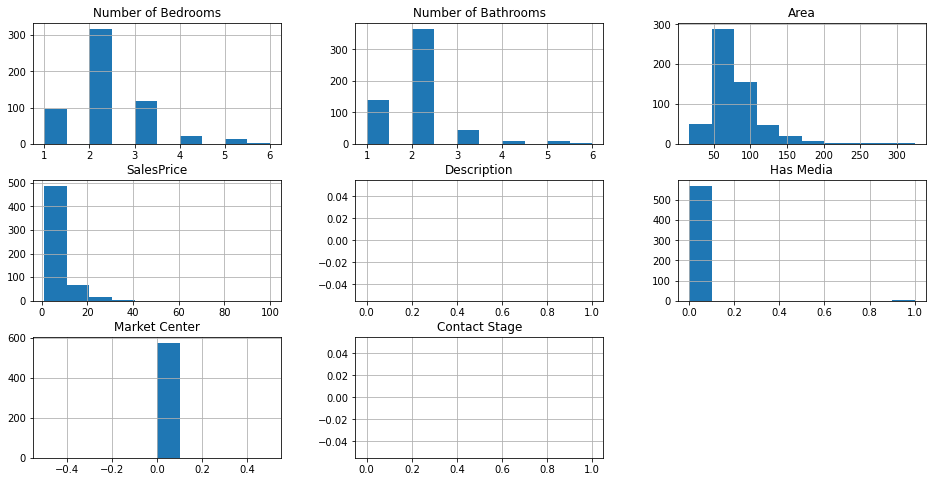

In [6]:
df_n.hist(figsize=(16,8))

- ## Data preprocessing (tiền xử lý dữ liệu)

In [7]:
df_n.columns

Index(['URL', 'Thumbnail', 'Title', 'Name', 'Address Origin', 'Address',
       'Number of Bedrooms', 'Number of Bathrooms', 'Area', 'SalesPrice',
       'Description', 'Has Media', 'Featured', 'Market Center',
       'Payment Currency', 'Property Type', 'Contact Stage', 'Furniture',
       'Lease End Date'],
      dtype='object')

In [8]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  576 non-null    object 
 1   Thumbnail            576 non-null    object 
 2   Title                576 non-null    object 
 3   Name                 576 non-null    object 
 4   Address Origin       576 non-null    object 
 5   Address              576 non-null    object 
 6   Number of Bedrooms   568 non-null    float64
 7   Number of Bathrooms  569 non-null    float64
 8   Area                 576 non-null    float64
 9   SalesPrice           576 non-null    float64
 10  Description          0 non-null      float64
 11  Has Media            576 non-null    int64  
 12  Featured             576 non-null    bool   
 13  Market Center        576 non-null    int64  
 14  Payment Currency     576 non-null    object 
 15  Property Type        576 non-null    obj

In [9]:
# Do cột Furniture là dữ liệu categorial mà ML chỉ hiểu dạng dữ liệu number nên chuyển cột đó thành dạng number
# basic: 0 (không có nội thất)
# empty : 1 (có nội thất)
# full: 2 (có đầy đủ nội thất)
# raw : 3 (nhà thô)
from sklearn.preprocessing import LabelEncoder
lb_furniture = LabelEncoder()

In [10]:
df_n['Furniture_n'] = lb_furniture.fit_transform(df['Furniture'])
df_n.head()

,URL,Thumbnail,Title,Name,Address Origin,Address,Number of Bedrooms,Number of Bathrooms,Area,SalesPrice,Description,Has Media,Featured,Market Center,Payment Currency,Property Type,Contact Stage,Furniture,Lease End Date,Furniture_n
0,https://rever.vn/mua/can-ho-westgate-huong-ban...,https://photo.rever.vn/v3/get/rvnQQX2UTBKeiR2m...,Căn hộ Westgate hướng ban công đông nam nội th...,Căn hộ Westgate hướng ban công đông nam nội th...,[object Object],"Tân Túc, Bình Chánh",2.0,2.0,59.0,2.88,NaN,0,False,0,vnd,apartment,NaN,basic,2023-11-29,0
1,https://rever.vn/mua/can-ho-the-golden-dynasty...,https://photo.rever.vn/v3/get/rvP5Oz3JZPEEAgue...,Căn hộ The Golden Dynasty (Hoàng Kim Thế Gia) ...,Căn hộ The Golden Dynasty (Hoàng Kim Thế Gia) ...,[object Object],"Trương Phước Phan, Bình Tân",4.0,4.0,145.0,3.90,NaN,0,False,0,vnd,apartment,NaN,basic,2023-11-29,0
2,https://rever.vn/mua/can-ho-estella-heights-di...,https://photo.rever.vn/photo/v3/get/rvjy9Y_6SO...,"Căn hộ Estella Heights, diện tích 89m²","Căn hộ Estella Heights, diện tích 89m²",[object Object],"Xa Lộ Hà Nội, Quận 2",2.0,2.0,89.0,8.10,NaN,0,False,0,vnd,apartment,NaN,full,2023-11-26,2
3,https://rever.vn/mua/can-ho-one-verandah-huong...,https://photo.rever.vn/photo/v3/get/rv7iToCGIv...,"Căn hộ One Verandah hướng Đông Nam, diện tích ...","Căn hộ One Verandah hướng Đông Nam, diện tích ...",[object Object],"Tạ Hiện, Quận 2",1.0,1.0,50.0,4.40,NaN,0,False,0,vnd,apartment,NaN,full,2023-11-26,2
4,https://rever.vn/mua/can-ho-sunrise-city-huong...,https://photo.rever.vn/v3/get/rv6Epi8ABl_hg5MW...,"Căn hộ Sunrise City hướng Tây, diện tích 76m²","Căn hộ Sunrise City hướng Tây, diện tích 76m²",[object Object],"Nguyễn Hữu Thọ, Quận 7",2.0,2.0,76.0,4.20,NaN,0,False,0,vnd,apartment,NaN,full,2023-11-26,2


In [11]:
# Filter the data
# Chọn cột cần xây dựng model và drop những cột không cần thiết
data= df_n.drop(['URL','Thumbnail','Title','Name','Address Origin','Address','Description','Has Media','Featured','Market Center','Payment Currency','Property Type','Contact Stage','Furniture','Lease End Date'],axis=1)
data


,Number of Bedrooms,Number of Bathrooms,Area,SalesPrice,Furniture_n
0,2.0,2.0,59.00,2.88,0
1,4.0,4.0,145.00,3.90,0
2,2.0,2.0,89.00,8.10,2
3,1.0,1.0,50.00,4.40,2
4,2.0,2.0,76.00,4.20,2
...,...,...,...,...,...
571,3.0,3.0,100.35,4.62,1
572,3.0,3.0,104.03,4.18,1
573,3.0,2.0,99.00,5.20,2
574,2.0,2.0,68.00,3.23,1


In [12]:
data1 = data[['Number of Bedrooms','Number of Bathrooms','Area','Furniture_n','SalesPrice']]
data1

,Number of Bedrooms,Number of Bathrooms,Area,Furniture_n,SalesPrice
0,2.0,2.0,59.00,0,2.88
1,4.0,4.0,145.00,0,3.90
2,2.0,2.0,89.00,2,8.10
3,1.0,1.0,50.00,2,4.40
4,2.0,2.0,76.00,2,4.20
...,...,...,...,...,...
571,3.0,3.0,100.35,1,4.62
572,3.0,3.0,104.03,1,4.18
573,3.0,2.0,99.00,2,5.20
574,2.0,2.0,68.00,1,3.23


- Tong hop tinh toan

In [13]:
data1.isna().sum()

Number of Bedrooms     8
Number of Bathrooms    7
Area                   0
Furniture_n            0
SalesPrice             0
dtype: int64

In [14]:
data1.dropna(inplace=True)


C:\Users\Win\AppData\Local\Temp\ipykernel_11144\978665401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace=True)


array([[<Axes: title={'center': 'Number of Bedrooms'}>,
        <Axes: title={'center': 'Number of Bathrooms'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Furniture_n'}>],
       [<Axes: title={'center': 'SalesPrice'}>, <Axes: >]], dtype=object)

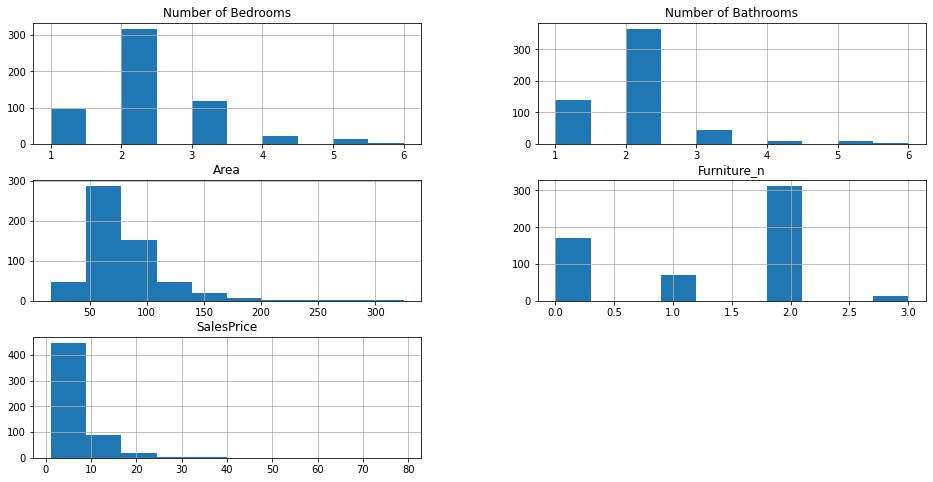

In [15]:
data1.hist(figsize=(16,8))

<Axes: >

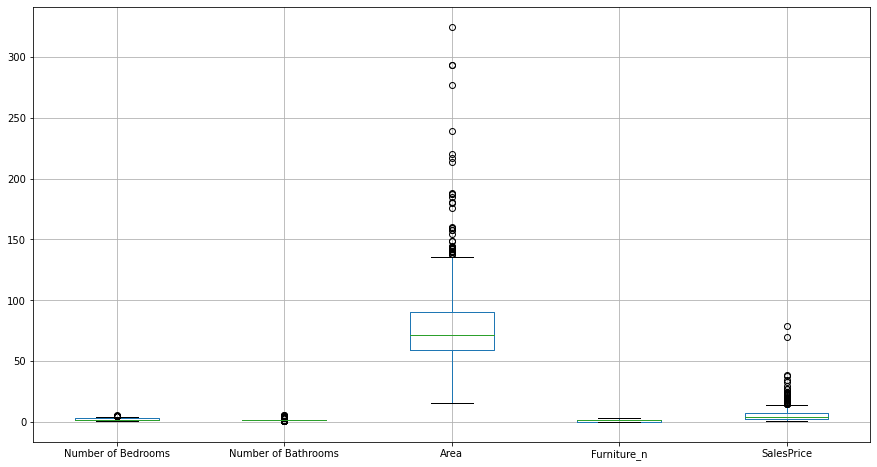

In [16]:
data1.boxplot(figsize=(15,8))

- ## Feature Selection
- X : data1.drop ['SalesPrice']
- y: data1 ['SalesPrice'] 

- ## Create Tree for Training Model ML
- ### Node class

In [17]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

- ### Tree class

In [18]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Train-Test split

In [19]:
X = data1.iloc[:, :-1].values
Y = data1.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.5, random_state= 41,shuffle=True)

### Fit the model

In [20]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_2 <= 70.5 ? 0.007641868148326902
 left:X_2 <= 55.0 ? 0.013578688934759664
  left:X_2 <= 38.0 ? 0.03527222222222226
    left:X_2 <= 26.2 ? 0.07587844254510923
        left:1.35
        right:1.7
    right:X_0 <= 1.0 ? 0.0616629464285714
        left:4.2
        right:5.5
  right:X_2 <= 59.3 ? 0.016500983931824087
    left:X_1 <= 1.0 ? 0.038855905998763096
        left:2.15
        right:3.3
    right:X_2 <= 67.12 ? 0.019119710949864088
        left:2.8
        right:3.3
 right:X_2 <= 116.0 ? 0.011600161522398511
  left:X_1 <= 2.0 ? 0.01200554009707655
    left:X_2 <= 71.7 ? 0.012199078341013858
        left:8.9
        right:6.5
    right:X_0 <= 3.0 ? 0.19727891156462585
        left:11.96
        right:8.1
  right:X_2 <= 143.0 ? 0.04841311134235182
    left:X_3 <= 0.0 ? 0.0613839285714286
        left:6.8
        right:13.0
    right:X_2 <= 149.0 ? 0.10666666666666658
        left:7.3
        right:24.0


### Test the model


In [21]:
Y_pred = classifier.predict(X_test) 

In [22]:
Y_true = Y_test.tolist()

Text(0.5, 1.0, 'Actual vs Predicted')

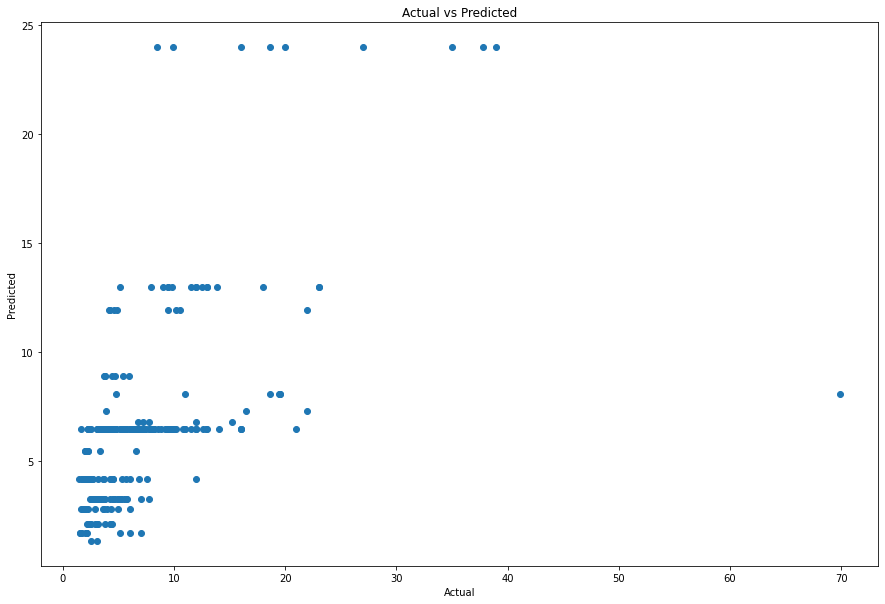

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')

In [ ]:
Y_pred = classifier.predict(X_test) 

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

In [25]:
Y_test.shape

(284, 1)